### Importing neccessary libary

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

### Imoporting data from `ucimlrepo`

In [2]:

# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 
  
# metadata 
print(automobile.metadata) 
  
# variable information 
print(automobile.variables) 

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

### EDA

In [3]:
# Fetch dataset
automobile = fetch_ucirepo(id=10)

In [4]:
# Convert features and targets to numeric values
features_df = pd.DataFrame(automobile.data.features)
targets_df = pd.DataFrame(automobile.data.targets)

features_df.head(10)

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
5,15250.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,177.3,99.8,front,fwd,sedan,2.0,std,gas,audi,NaN
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,192.7,105.8,front,fwd,sedan,4.0,std,gas,audi,158.0
7,18920.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,192.7,105.8,front,fwd,wagon,4.0,std,gas,audi,NaN
8,23875.0,20,17,5500.0,140.0,8.3,3.40,3.13,mpfi,131,...,192.7,105.8,front,fwd,sedan,4.0,turbo,gas,audi,158.0
9,NaN,22,16,5500.0,160.0,7.0,3.40,3.13,mpfi,131,...,178.2,99.5,front,4wd,hatchback,2.0,turbo,gas,audi,NaN


### Convert data to numberic numbers

In [5]:
X = features_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1)
y = targets_df.apply(pd.to_numeric, errors='coerce').fillna(0)

X.head(10)

,highway-mpg,city-mpg,compression-ratio,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base
0,27,21,9.0,130,4,2548,48.8,64.1,168.8,88.6
1,27,21,9.0,130,4,2548,48.8,64.1,168.8,88.6
2,26,19,9.0,152,6,2823,52.4,65.5,171.2,94.5
3,30,24,10.0,109,4,2337,54.3,66.2,176.6,99.8
4,22,18,8.0,136,5,2824,54.3,66.4,176.6,99.4
5,25,19,8.5,136,5,2507,53.1,66.3,177.3,99.8
6,25,19,8.5,136,5,2844,55.7,71.4,192.7,105.8
7,25,19,8.5,136,5,2954,55.7,71.4,192.7,105.8
8,20,17,8.3,131,5,3086,55.9,71.4,192.7,105.8
9,22,16,7.0,131,5,3053,52.0,67.9,178.2,99.5


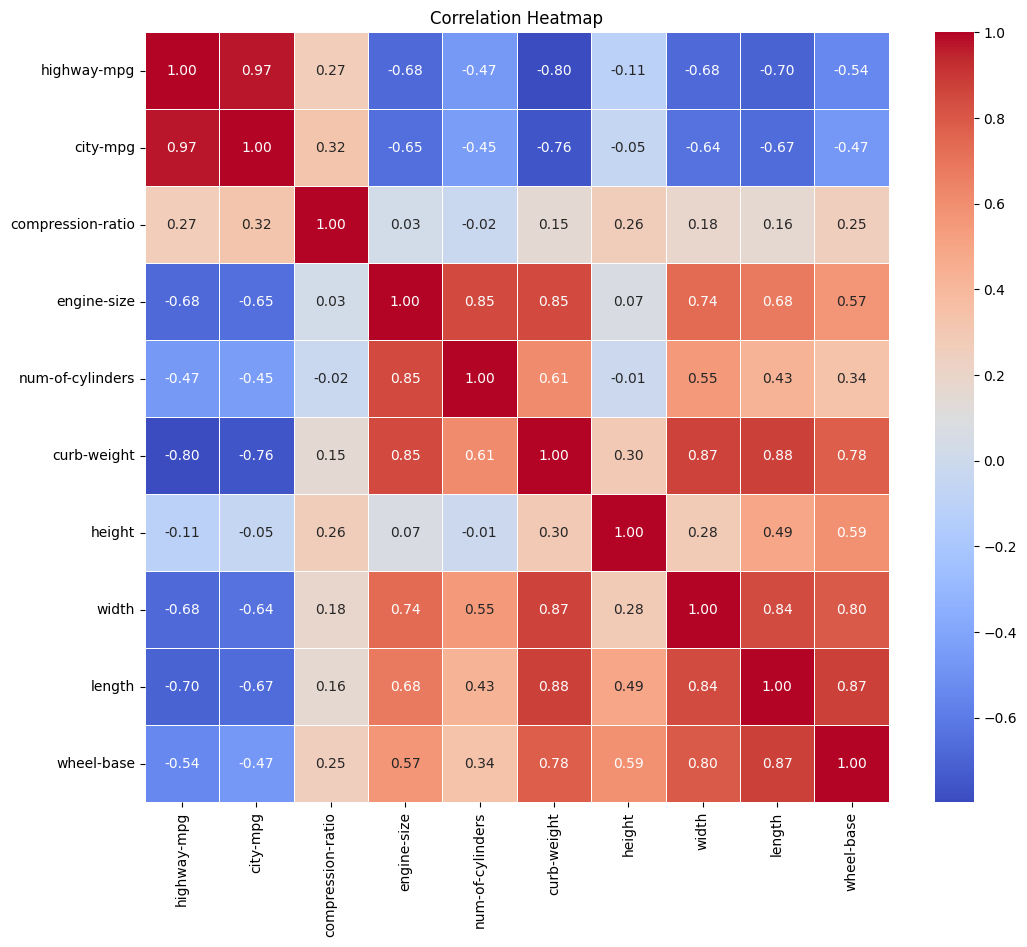

In [6]:
corr_matrix = X.corr()


# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Remove Highly correlated data

In [7]:
# Remove features with correlation higher than 0.65
high_correlation_features = corr_matrix[abs(corr_matrix) > 0.8]
high_correlation_features = high_correlation_features.stack().reset_index()
high_correlation_features = high_correlation_features[high_correlation_features['level_0'] != high_correlation_features['level_1']]
high_correlation_features

,level_0,level_1,0
1,highway-mpg,city-mpg,0.971337
2,city-mpg,highway-mpg,0.971337
6,engine-size,num-of-cylinders,0.846031
7,engine-size,curb-weight,0.850594
8,num-of-cylinders,engine-size,0.846031
10,curb-weight,engine-size,0.850594
12,curb-weight,width,0.867032
13,curb-weight,length,0.877728
15,width,curb-weight,0.867032
17,width,length,0.841118


In [8]:
features_to_remove = ['city-mpg', 'engine-size', 'width', 'length','height', 'wheel-base']
# Drop features with high correlation
df_filtered = X.drop(columns=features_to_remove)

df_filtered.head(10)

,highway-mpg,compression-ratio,num-of-cylinders,curb-weight
0,27,9.0,4,2548
1,27,9.0,4,2548
2,26,9.0,6,2823
3,30,10.0,4,2337
4,22,8.0,5,2824
5,25,8.5,5,2507
6,25,8.5,5,2844
7,25,8.5,5,2954
8,20,8.3,5,3086
9,22,7.0,5,3053


### Split data into training and testing sets

In [9]:
X = df_filtered.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train
y_test.shape
X_test.shape

(41, 4)

In [11]:
# Define kernel
kernel = 1.0 * RBF(length_scale=1.0)
kernel

1**2 * RBF(length_scale=1)

In [12]:
# Train Gaussian Process
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

In [35]:
# Evaluate model
mean_prediction, std_prediction = gaussian_process.predict(X_test, return_std=True)
mse = mean_squared_error(y_test, mean_prediction)
mae = mean_absolute_error(y_test, mean_prediction)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

mean_prediction

Mean Squared Error: 1.4878048780487805
Mean Absolute Error: 0.75609756097561


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,
        0.,  0.])

In [45]:
y_mean, y_std = gaussian_process.predict(X, return_std=True)
y_mean

array([ 3.    ,  3.    ,  1.    ,  2.    ,  2.    ,  2.    ,  1.    ,
        1.    ,  1.    ,  0.    ,  1.    ,  1.    ,  0.    ,  0.    ,
        1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
       -1.    ,  3.    ,  0.    ,  2.    ,  1.    ,  1.    ,  1.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        1.    ,  0.    ,  1.    ,  0.    ,  2.    ,  0.    ,  0.    ,
        0.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  3.    ,
        3.    ,  3.    ,  3.    ,  1.    ,  0.    ,  1.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
       -1.    , -1.    ,  3.    ,  0.    ,  1.    ,  1.    ,  1.4375,
        2.    ,  2.    ,  0.    ,  3.    ,  3.    ,  0.    ,  3.    ,
        0.    ,  1.    ,  0.    ,  0.125 ,  0.125 ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  0.    ,  1.    ,  0.    ,
        0.    ,  0. 

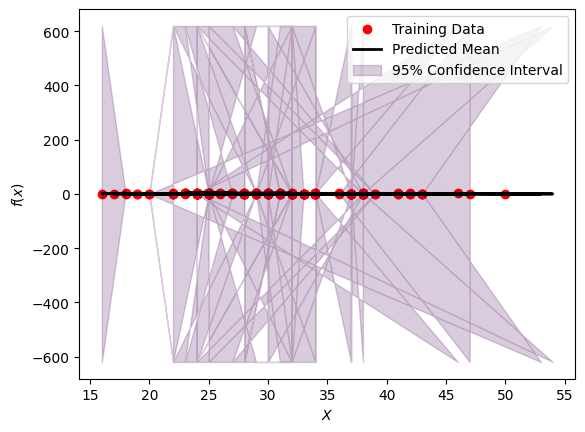

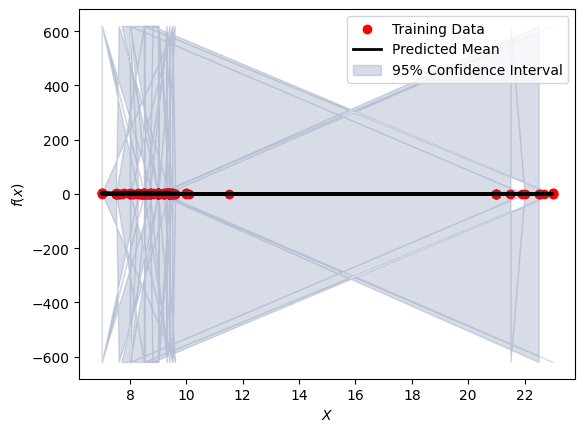

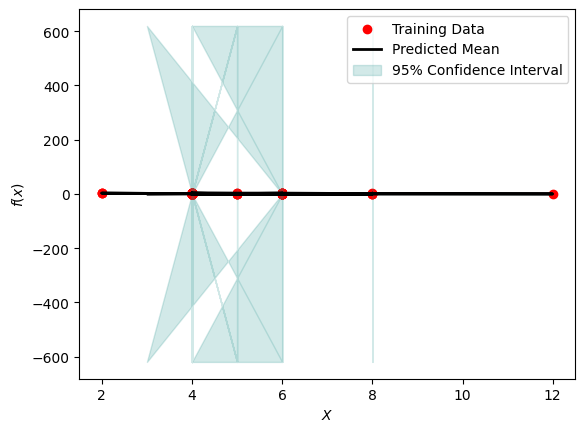

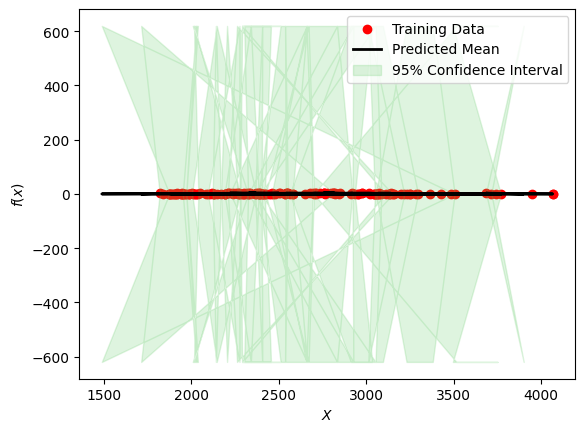

In [50]:
# Scatter plot for observations
# plt.scatter(X_test[:, 0], y_test, label="Observation", color='blue', alpha=0.5)

# Plot mean prediction and confidence interval for each feature
for i in range(X_test.shape[1]):
    feature_label = features_df.columns[i]
    color = plt.cm.viridis(i / X_test.shape[1])  # Using a colormap to generate different colors
    
    plt.scatter(X_train[:, i], y_train, c='r', label='Training Data')
    plt.plot(X[:, i], y_mean, 'k', lw=2, zorder=9, label='Predicted Mean')

    plt.fill_between(X[:, i], y_mean - 1.96 * y_std, y_mean + 1.96 * y_std, alpha=0.2, color=color, label='95% Confidence Interval')

    # plt.plot(X_test[:, i], y_test, label=feature_label, color=color, alpha=0.7)
    # plt.fill_between(
    #     X_test[:, i],
    #     mean_prediction - 1.96 * std_prediction,
    #     mean_prediction + 1.96 * std_prediction,
    #     alpha=0.2,
    #     color=color,
    #     label="Gussian"
    # )

    plt.legend()
    plt.xlabel("$X$")
    plt.ylabel("$f(x)$")
    plt.show()

ValueError: 'y1' is not 1-dimensional

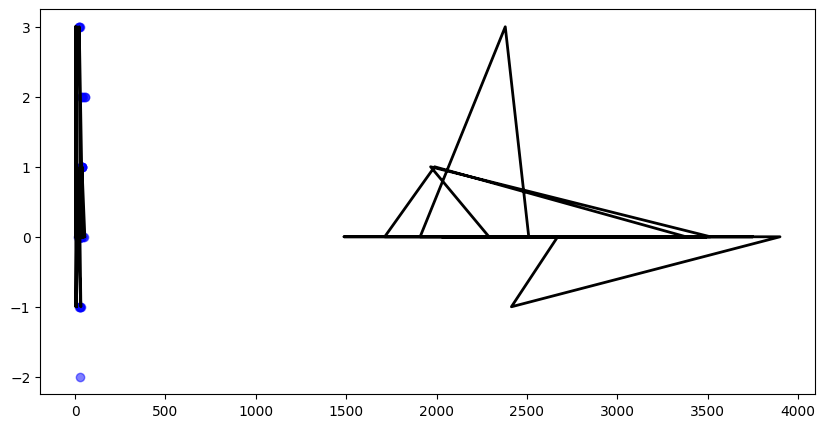

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 0], y_test, label="Observation", color='blue', alpha=0.5)
# plt.scatter(X_train, y_train, c='r', label='Training Data')
plt.plot(X_test, mean_prediction, 'k', lw=2, zorder=9, label='Predicted Mean')
plt.fill_between(X_test[:, 0], mean_prediction - 1.96 * np.sqrt(np.diag(std_prediction)), mean_prediction + 1.96 *
                 np.sqrt(np.diag(std_prediction)), alpha=0.2, color='k', label='95% Confidence Interval')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [16]:
# Add noise to training targets
rng = np.random.RandomState(1)
noise_std = np.sqrt(0.03)
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

In [17]:
# Evaluate model
mean_prediction, std_prediction = gaussian_process.predict(X_test, return_std=True)
mse = mean_squared_error(y_train_noisy, mean_prediction)
mae = mean_absolute_error(y_train_noisy, mean_prediction)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

ValueError: Found input variables with inconsistent numbers of samples: [164, 41]

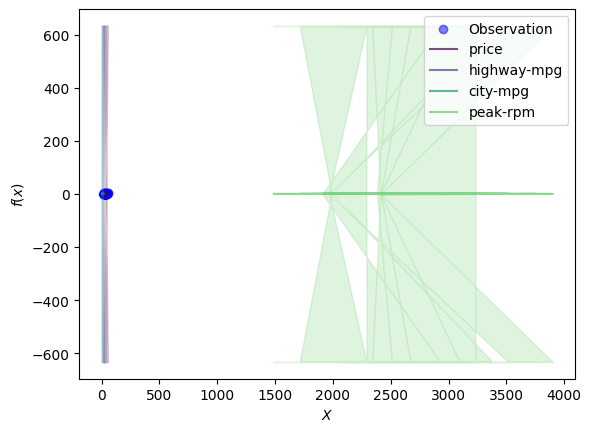

In [18]:
# Scatter plot for observations
plt.scatter(X_test[:, 0], y_test, label="Observation", color='blue', alpha=0.5)

# Plot mean prediction and confidence interval for each feature
for i in range(X_test.shape[1]):
    feature_label = features_df.columns[i]
    color = plt.cm.viridis(i / X_test.shape[1])  # Using a colormap to generate different colors
    
    plt.plot(X_test[:, i], mean_prediction, label=feature_label, color=color, alpha=0.7)
    plt.fill_between(
        X_test[:, i],
        mean_prediction - 2 * std_prediction,
        mean_prediction + 2 * std_prediction,
        alpha=0.2,
        color=color
    )

plt.legend()
plt.xlabel("$X$")
plt.ylabel("$f(x)$")
plt.show()